# Example: Lunar atmospheric tides, c 1775 AD

A fanciful and historically innacurate illustration.

Question: why do oceanic tides rise and fall?

Hypothesis 1:Because the seas are sloshing like water in a bath tub.

Hypothesis 2: Because universal Newtonian gravititational attraction holds for all the stuff that has mass. The moon and seas both have mass and, furthermore, water is flexible, so the gravitational between the moon and seas pulls a bulge in the surface of the ocean. The high point of the bulge is always directed toward the moon, but since the earth is rotating on its axis daily, the high point of the bulge changes location relative to a fixed point on the surface of the earth, such as the shoreline of a land mass. What we measure as the rise and fall of the tides at Scripps Pier is coming and going of the lunar bulge. Except there are two high tides not one because the lunar gravity doesn't just pull *a* bulge into the oceans, it squeezes the earth into two bulges, one directed toward the moon and the other directed away, so a point on the surface passes through two bulges a day.

Other things equal, Occam's Razor recommends the simpler explantion which requires only familiarity with water and tubs. It does not appeal to crazy ideas like action-at-a-distance and "gravity between everything" or the notion that the earth is spinning like a top so fast that a point on the equator transits 36000 miles every day. In fact, other than earthquakes, the earth generally seems to hold pretty still. Salvaging the lunar gravity explanation by saying the earth is spinning but we don't notice it because we are spinning with it at the same rate is hard to swallow. We know what its like to ride a horse at a gallop and its not hard to tell the difference between standing still and going 15 mile per hours. If we were going 36,000 miles per hour, you would think we might notice.

But other things are not equal. The lunar gravitation explanation pays off the debt of its greater complexity and wildly implausible assumptions with the specificity of its predictions. The sloshing explantion says *that* the tides rise and fall but has no principled explanation of when. The lunar tide explanantion plus math can predict the rise and fall with considerable accuracy.

Still it would be nice to have some kind of converging evidence ...

Well if ocean tides are because the moon and water are stuff and gravity pulls a bulge in the flexible stuff then there should also be a lunar tide in other flexible stuff. Air ... the earth's atmosphere ... is stuff too, that's why we feel wind (the reason we don't feel a 36000 mph wind is because the atmosphere is, for the most part, spinning along with us and rest of the surface of the earth). 

The upshot is there should be a lunar bulge in the atmosphere that comes and goes past the same fixed point on the surface. 

The "bulge" should be measurable as a change in the air pressure (barometer, mm of Hg).

The change should be as regular as the tides, and in fact synchronized with them.

The problem is that the change is very small and there are many other variables that impact barometric pressure that are *not* synchronized with the location of the moon such as solar heating during the day and cooling overnight and large scale seaonsal weather systems.

How then to measure tiny lunar tides in the atmosphere ("signal") in all the other variation ("noise").

# Laplace's suggestion: time-domain summation

Reduce variation across measurements at each time by summation

Average = summation normalized by the number of observations

Time-domain averaging

In [38]:
from pathlib import Path
import numpy as np
import pandas as pd
from pandas.plotting import register_matplotlib_converters
from matplotlib import pyplot as plt
plt.style.use("seaborn-bright")
rc_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']


import fitgrid as fg
from fitgrid import DATA_DIR

register_matplotlib_converters()  # to supress datetime FutureWarning

# path to hourly water level and meteorology data
WDIR = DATA_DIR / "CO-OPS_9410230"


data = pd.read_hdf(DATA_DIR / "CO-OPS_9410230.h5", key="data")
epochs_df = pd.read_hdf(DATA_DIR / "CO-OPS_9410230.h5", key="epochs_df")

# epochs time domain average 
epochs_tda = epochs_df.groupby('time').mean().reset_index('time')

## Time-locked epochs are segments of recorded data

![](../../build/html/_images/user_guide_fg_epochs_noaa_csv_to_epochs_14_0.png)


# Time-domain averaging

Align epochs and average across all data points at each timestamp.

Example: time-align measurements starting at 12:00AM and average across 10 years of water level and meteorological measurements.

* **Air temperature** is predictably **monophasic** over 24 hours, driven by solar heating. The 0-hour onset of the 24 hour epochs is midnight. The air temperature is low and continues to cool until 5am, then begins to warm with sunrise peaking between 12 - 4pm and then cooling again.

* **Water Level** is predictably **biphasic** driven by lunar gravity which pulls the earth and oceans into a two-ended bulge. A point on the surface of the spinning earth passes through two ocean bulges a day.

* **Standard normal noise** 


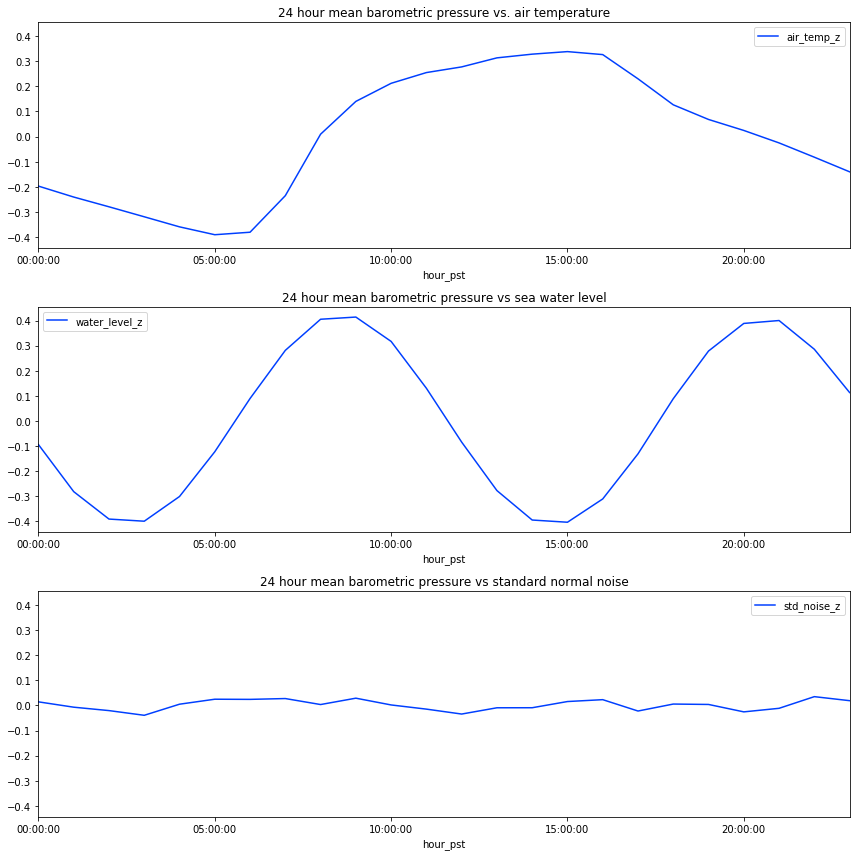

In [39]:
plt.style.use("seaborn-bright")
data_mn_by_hour = data.groupby('hour_pst').mean().reset_index()

f, axs = plt.subplots(3, figsize=(12,12), sharey=True)

data_mn_by_hour.plot(x="hour_pst", y=["air_temp_z"], ax=axs[0])
axs[0].set_title('24 hour mean barometric pressure vs. air temperature')

data_mn_by_hour.plot(x="hour_pst", y=["water_level_z"], ax=axs[1])
axs[1].set_title('24 hour mean barometric pressure vs sea water level')

data_mn_by_hour.plot(x="hour_pst", y=["std_noise_z"], ax=axs[2])
axs[2].set_title('24 hour mean barometric pressure vs standard normal noise')

f.tight_layout()


Align epochs on time=0 high oceanic tide and average at each hour

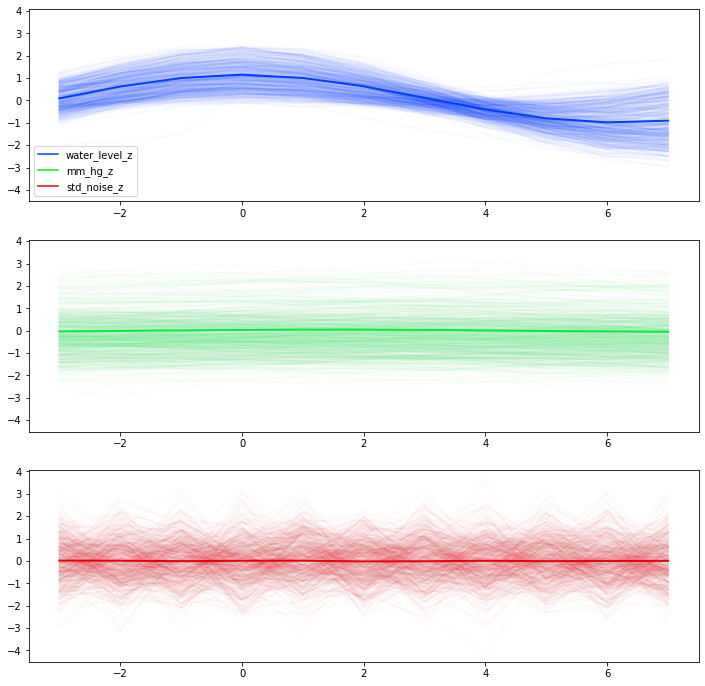

In [40]:
measures = ['water_level_z', 'mm_hg_z', 'std_noise_z']
alpha = 0.025

f, axs = plt.subplots(len(measures), 1, figsize= (12, 12), sharey=True)
cnt = 0

# butterfly plot a few hundred epochs
for epid, epdata in epochs_df.reset_index('time').groupby('epoch_id'):
    for axi, meas in enumerate(measures):
        axs[axi].plot(epdata['time'], epdata[meas], color=rc_colors[axi], alpha=alpha)

    # slow ... just plot first 256 high tides
    if cnt > 512:
        break
    cnt += 1

# overplot the time-domain average
for axi, meas in enumerate(measures):
    axs[axi].plot(epochs_tda['time'], epochs_tda[meas], color=rc_colors[axi], lw=2)

leg = axs[0].legend(measures)
for lidx, line in enumerate(leg.get_lines()):
    line.set(alpha=1.0, color=rc_colors[lidx])


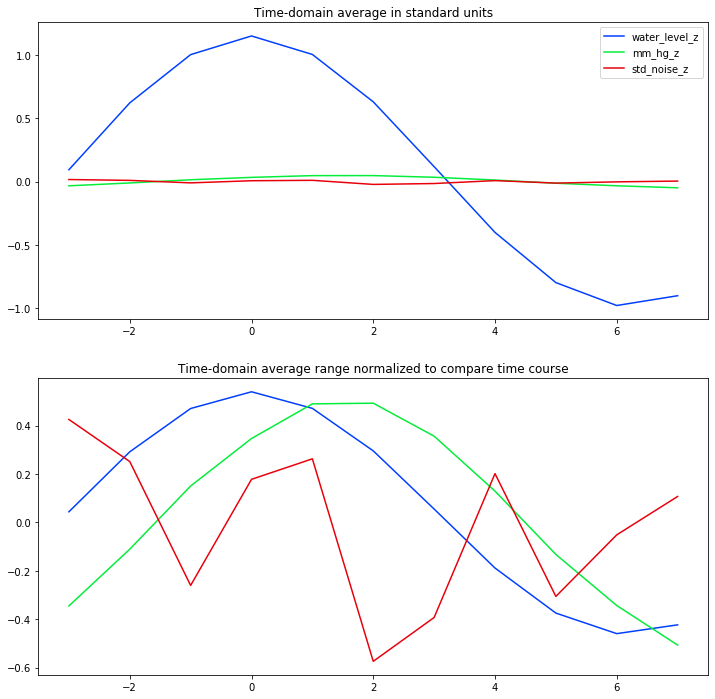

In [41]:
f, axs = plt.subplots(2, 1, figsize=(12,12))
for midx, meas in enumerate(measures):
    meas_range = epochs_tda[meas].max() - epochs_tda[meas].min()
    axs[0].plot(epochs_tda.time, epochs_tda[meas] , color=rc_colors[midx])
    axs[1].plot(epochs_tda.time, epochs_tda[meas] / meas_range, color=rc_colors[midx])

axs[0].legend(measures);
axs[0].set_title(f"Time-domain average in standard units");
axs[1].set_title(f"Time-domain average range normalized to compare time course");

# Modeling with fitgrid

In [42]:
import fitgrid.utils as fgu

In [43]:
chans = ['water_level_z', 'mm_hg_z', 'std_noise_z']
epochs_fg = fg.epochs_from_dataframe(
    epochs_df,
    time='time',
    epoch_id='epoch_id',
    channels=chans
    )


In [44]:
lm_1 = fg.lm(
    epochs_fg,
    RHS='1 + water_level_z',
    LHS=['mm_hg_z']
)

100%|██████████| 11/11 [00:00<00:00, 55.79it/s]


In [9]:
dir(lm_1)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '_cache',
 '_data_attr',
 '_get_robustcov_results',
 '_is_nested',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'influential_epochs',
 'initialize',
 'k_constant',
 'llf',
 'load',
 'model',
 'mse_model',
 'mse_resid',
 'mse_total',
 'nobs',
 'normalized_cov_params',
 'outlier_test',
 'params',
 'plot_adj_rsquared',
 'plot_betas',
 'predict',
 'pvalues',
 'remove_data',
 'resid',
 'resid_pearson',
 'rsquared',
 'rsquared_adj',
 'save',
 'save',
 'scale',
 'ssr',
 'summary',
 'summary2',
 't_test',
 't_test_pairwise',
 'tvalues',
 '

In [46]:
%%time

summaries = fgu.summary.summarize(
    epochs_fg,
    modeler='lm',
    RHS=[
        "1 + mm_hg_z",       # does barometric pressure predict oceanic tides?
        "1 + std_noise_z",   # does random variability predict oceanic tides?
        "1",                 # intercept only ... no predictor at all
    ],
    LHS=['water_level_z'],
)

100%|██████████| 11/11 [00:00<00:00, 59.95it/s]


CPU times: user 1.99 s, sys: 451 ms, total: 2.44 s
Wall time: 1.71 s


split summaries by model ... note number of parameters varies by model

Estimated paramters by model


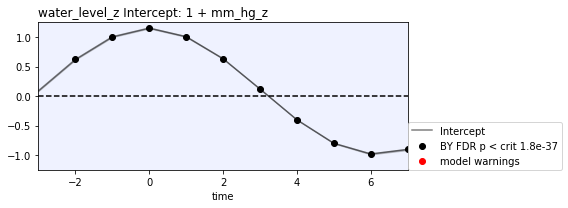

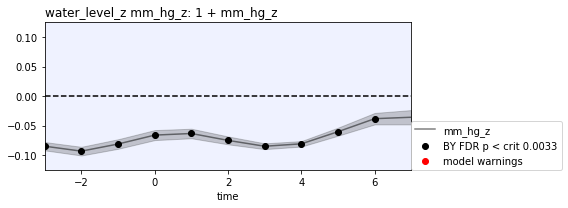

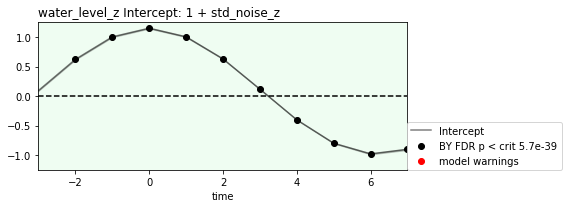

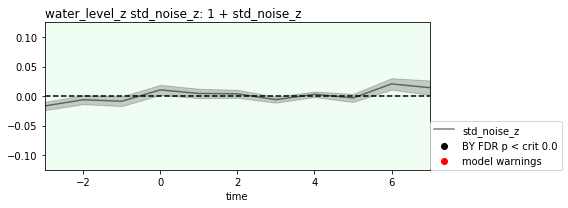

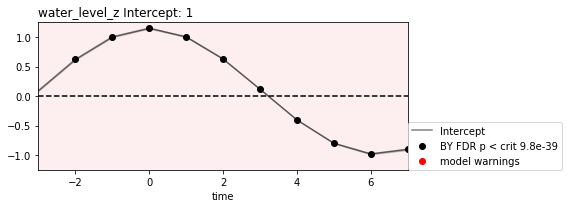

In [47]:
models = summaries.index.unique('model')
print('Estimated paramters by model')
for styidx, model in enumerate(models):
    figs = fgu.summary.plot_betas(
        summaries.query('model == @model'),
        LHS=["water_level_z"],
        fdr="BY",
    )
    
    # tune up axes ...
    for f in figs:
        for ax in f.get_axes():
            ax.set_facecolor(rc_colors[styidx] + "10") # alpha
            ylm = 1.25 if str(ax.lines[0].get_label()) == "Intercept" else 0.125
            ax.set(ylim=[-ylm, ylm])
            
        f.tight_layout();

# Akiaki Information Criterion: $\Delta$AIC$_{min}$ model comparison

How do barometric pressure (`water_level_z ~ 1 + mm_hg_z`) vs random noise (`water_level_z ~ 1 + std_noise_z`) vs no predictor at all (`water_level_z ~ 1`) compare as models of tide level?

Compare the models as a set vs the model with the lowest AIC at each timestamp.

For the same data, lower AIC values are better fitting, higher AIC values are worse fitting.

The comparison metric is the **difference** between each model $M_{i}$ AIC and the model with the smallest AIC in the set ($AIC_{min}$).

$\Delta AIC = AIC_{M_i} - AIC_{min}$

One model (at least) always has the minimum AIC so $\delta$AIC = 0 for the AIC difference for that model and itself.

Over the course of a day (hour 0 - 23) barometric pressure is **ALWAYS** a better predictor of atmospheric pressure than random variation at every hour.


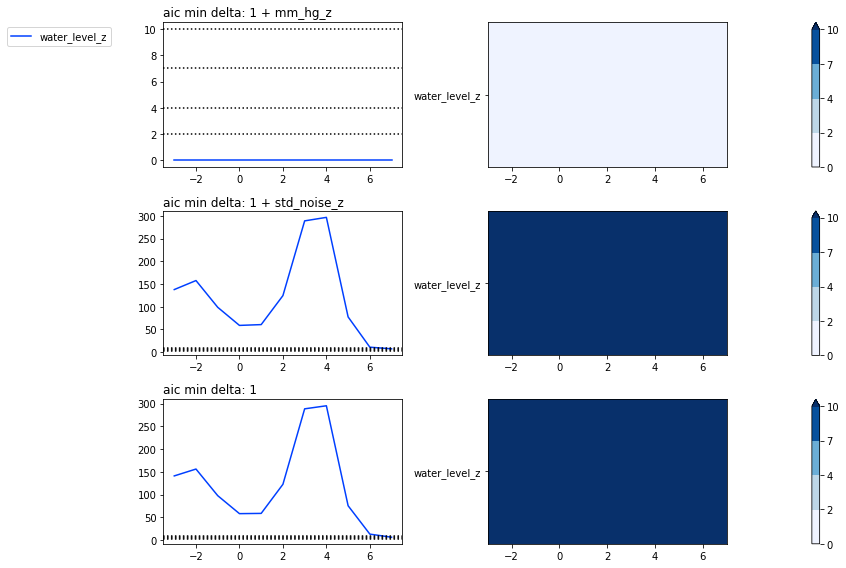

In [12]:
f, axs = fgu.summary.plot_AICmin_deltas(summaries)
f.tight_layout()

# Type I Errors?

Adding (continuous) predictor variable(s) increases the number of model parameters by 1 at a cost of +2 per parameter for the large N AIC).

Adding predictor variables cannot **increase** residual error, i.e., cannot make the (classical OLS) model fit **worse** than no predictor and will generally reduce the residual error at least some because of chance variation in the predictor that happens to pattern with the response variable. 

So the questions are how often does the better fit arise by chance, and how much better is the fit when it does?

One way to see this is to compare AIC for models with and without a standard normal noise predictor variable.

This example shows that on the AIC metric extra parameter 

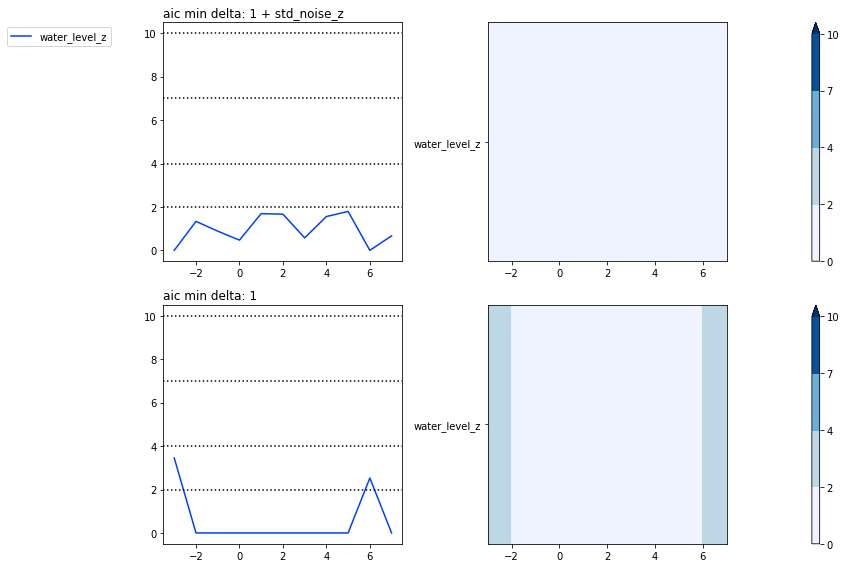

In [15]:
f, axs = fgu.summary.plot_AICmin_deltas(
    summaries.drop(level="model", index="1 + mm_hg_z")
)
f.tight_layout()

# NOAA sea level and meteorology data

downloaded January 29, 2020

Station: La Jolla, CA 94102 (Scripps)
August 1, 2010 - July 1, 2020


Water levels  relative to mean sea level:

https://tidesandcurrents.noaa.gov/waterlevels.html?id=9410230&units=standard&timezone=GMT&action=data


Note: Water level data is, measured relative to MSL = mean sea level measured hourly.

https://tidesandcurrents.noaa.gov/datum_options.html


Meteorological Observations:

https://tidesandcurrents.noaa.gov/met.html?id=9410230&units=standard&timezone=GMT&action=data


NOAA Glossary

https://tidesandcurrents.noaa.gov/glossary.html

General information

https://tidesandcurrents.noaa.gov/publications/Computational_Techniques_for_Tidal_Datums_handbook.pdf